# Heart Failure Prediction Project 

**Problem Statement:** Heart failure occurs when the heart muscle doesn't pump blood as well as it should. Blood often backs up and causes fluid to build up in the lungs (congest) and in the legs. The fluid buildup can cause shortness of breath and swelling of the legs and feet. Poor blood flow may cause the skin to appear blue (cyanotic).

In this project I'll build a machine learning model that can help in detecting/predicting heart failure based on the following features: age, gender, blood pressure, smoke, diabetes, ejection fraction etc.

**Dataset Link:-** The dataset used was gotten from kaggle https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## Loading and Exploring the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


So we can see our various features and our target variable which is the column **'DEATH_EVENT'**

In [5]:
print("Shape of data: ", data.shape)

Shape of data:  (299, 13)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

age,anaemia,                creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time                        

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Exploratory Data Analysis

Total No. of living case:  203
Total No. of dead cases:  96


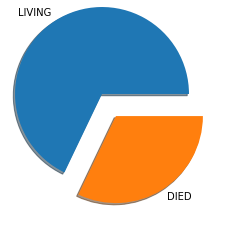

<Figure size 432x288 with 0 Axes>

In [9]:
len_live = len(data['DEATH_EVENT'][data.DEATH_EVENT == 0])
len_death = len(data['DEATH_EVENT'][data.DEATH_EVENT == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING', 'DIED']
print('Total No. of living case: ', len_live)
print('Total No. of dead cases: ', len_death)

plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True)
plt.show()
plt.savefig("pie1.png")

The Pie Chart helps us to see clearly the ratio of living cases and dead cases. 

We can also see that the data is imbalanced because the number of living cases is way more than the number of died cases. In other words our data is not equally distributed between classes.

Total No. of Females:  105
Total No. of Males:  194


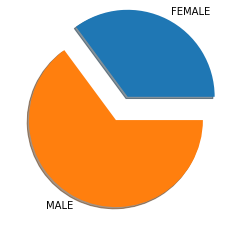

<Figure size 432x288 with 0 Axes>

In [11]:
len_female = len(data['sex'][data.sex == 0])
len_male = len(data['sex'][data.sex == 1])

arr = np.array([len_female, len_male])
labels = ['FEMALE', 'MALE']
print('Total No. of Females: ', len_female)
print('Total No. of Males: ', len_male)

plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True)
plt.show()
plt.savefig("pie2.png")

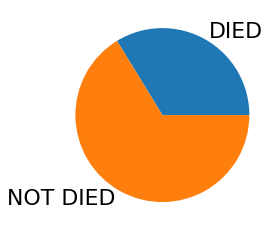

Total No of Dead Cases:  85
Total No of Not Dead Cases 167


<Figure size 432x288 with 0 Axes>

In [30]:
# selecting columns that are above 50 and checking if they died or not

age_above_fifty_not_died = data['DEATH_EVENT'][data.age >=50][data.DEATH_EVENT == 0]
age_above_fifty_died = data['DEATH_EVENT'][data.age >=50][data.DEATH_EVENT == 1]

len_died = len(age_above_fifty_died)
len_not_died = len(age_above_fifty_not_died)

arr1 = [len_died, len_not_died]
labels = ['DIED', 'NOT DIED']

plt.pie(arr1, labels = labels, shadow = False)
plt.show()
plt.savefig('pie2.png')

print("Total No of Dead Cases: ", len_died)
print("Total No of Not Dead Cases", len_not_died)

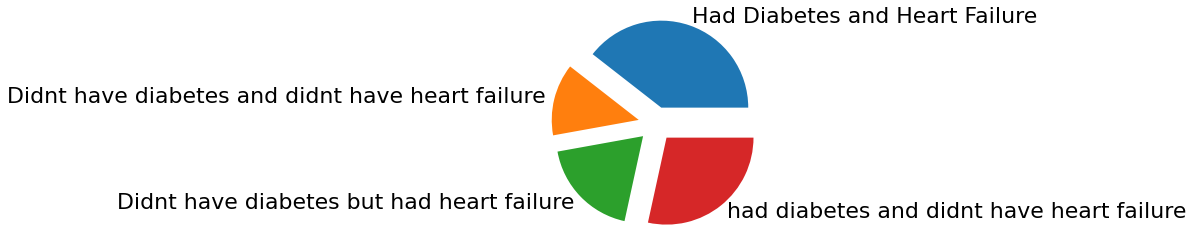

No of People that Had Diabetes and Heart Failure:  118
No of People that didnt have diabetes and didnt have heart failure:  40
No of People that didnt have diabetes but had heart failure:  56
No of People that had diabetes and didnt have heart failure:  85


<Figure size 432x288 with 0 Axes>

In [38]:
patient_have_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 0][data.DEATH_EVENT == 0]
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]
patient_have_diabetes_2 = data['DEATH_EVENT'][data.diabetes == 0][data.DEATH_EVENT == 1]
patient_have_diabetes_3 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0]

len1 = len(patient_have_diabetes_0)
len2 = len(patient_have_diabetes_1)
len3 = len(patient_have_diabetes_2)
len4 = len(patient_have_diabetes_3)

arr2 = [len1,len2,len3,len4]

labels = ['Had Diabetes and Heart Failure', 'Didnt have diabetes and didnt have heart failure', 'Didnt have diabetes but had heart failure', 'had diabetes and didnt have heart failure']

plt.pie(arr2, labels = labels, explode = [0.2,0.2,0.2,0.2], shadow = False)
plt.show()
plt.savefig('pie2.png')

print("No of People that Had Diabetes and Heart Failure: ", len1)
print("No of People that didnt have diabetes and didnt have heart failure: ", len2)
print("No of People that didnt have diabetes but had heart failure: ", len3)
print("No of People that had diabetes and didnt have heart failure: ", len4)

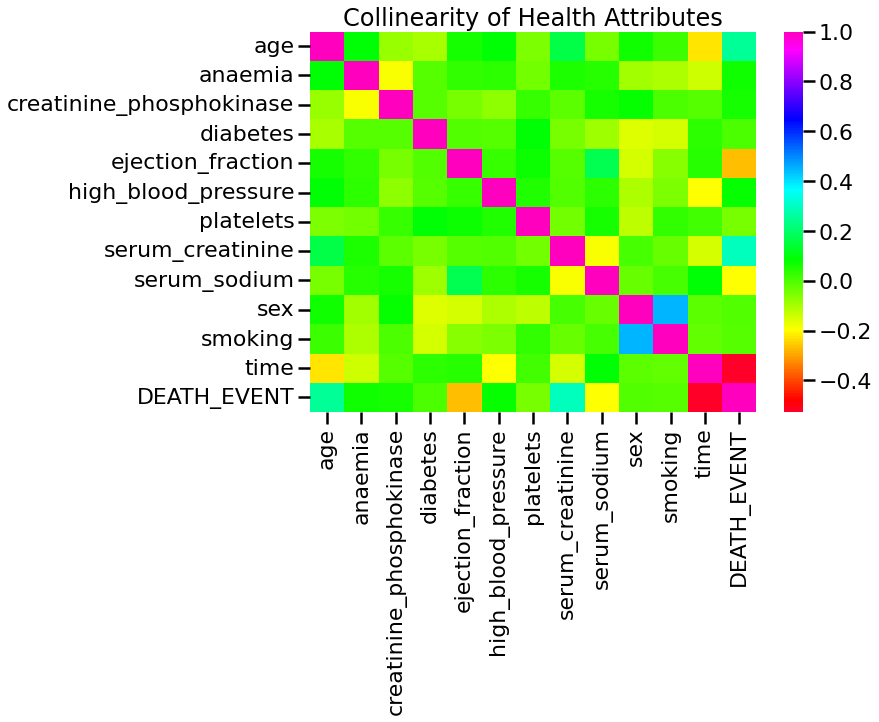

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set_context('poster')
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='gist_rainbow')
ax.set_title('Collinearity of Health Attributes')
plt.savefig('cormap.png')

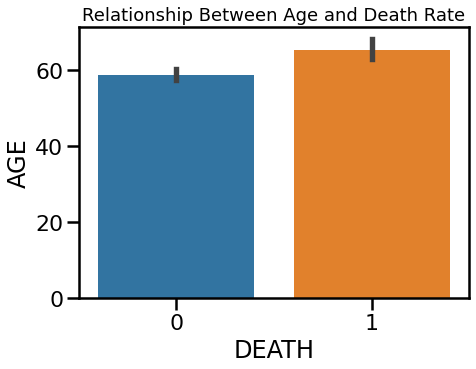

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x =data['DEATH_EVENT'], y = data['age'])
plt.xlabel("DEATH") 
plt.ylabel("AGE")
plt.title("Relationship Between Age and Death Rate", fontsize = 18)
plt.show()
plt.savefig('chart1.png')

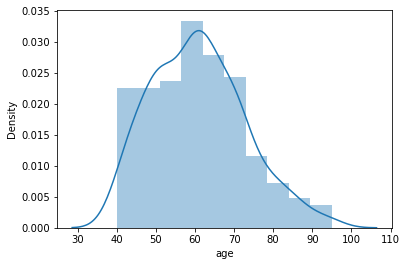

<Figure size 432x288 with 0 Axes>

In [10]:
# age distribution plot
sns.distplot(data['age'])
plt.show()
plt.savefig('ageplot.png')

We can see that most of the cases are around people of age 60

## Splitting the data

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop("DEATH_EVENT", axis = 1)
y = data.DEATH_EVENT

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (299, 12)
Shape of y:  (299,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Engineering
In this section we create more features by creating more interaction features by taking the product of 2 features and creating new columns

In [44]:
def add_interaction(X):
    features = X.columns
    n = len(features)
    X_int = X.copy(deep=True)
    
    for i in range(n):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, n):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
            
    return X_int

x_train_mod = add_interaction(X_train)
x_test_mod = add_interaction(X_test)

What the above function does is that it creates more feature columns by multiplying each column with another column and creates a new column for the product.


In [45]:
x_train_mod.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
134,81.0,0,4540,0,35,0,231000.0,1.18,137,1,...,161.66,1.18,1.18,126.26,137,137,14659,1,107,107
145,50.0,0,185,0,30,0,266000.0,0.70,141,1,...,98.70,0.70,0.70,78.40,141,141,15792,1,112,112
63,45.0,0,582,0,35,0,385000.0,1.00,145,1,...,145.00,1.00,0.00,61.00,145,0,8845,0,61,0
292,52.0,0,190,1,38,0,382000.0,1.00,140,1,...,140.00,1.00,1.00,258.00,140,140,36120,1,258,258
284,50.0,1,54,0,40,0,279000.0,0.80,141,1,...,112.80,0.80,0.00,200.00,141,0,35250,0,250,0


We can now see that we have 78 columns for the modified training set after applying the function. 

## Model Building
The **evaluate_model** function below will be used to evaluate the accuracy of our model and also give the confusion matrix of our model.


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    
    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    plt.savefig('conf1.png')
    
    


### Logistic Regression
We will be using the Logistic Regression model as a baseline model.

In [48]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)

lr_clf_pred = lr_clf.predict(X_test)

Accuracy Score:  0.7333333333333333
Precision Score:  0.8181818181818182
Recall Score:  0.391304347826087
Confusion Matrix:  [[35  2]
 [14  9]]


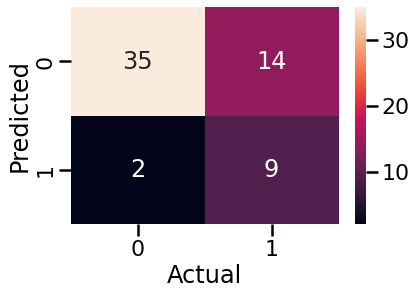

In [49]:
y_pred = lr_clf.predict(X_test)
evaluate_model(y_test, y_pred)

Building Logistic Regression model with standardiser

Accuracy Score:  0.7833333333333333
Precision Score:  0.9166666666666666
Recall Score:  0.4782608695652174
Confusion Matrix:  [[36  1]
 [12 11]]


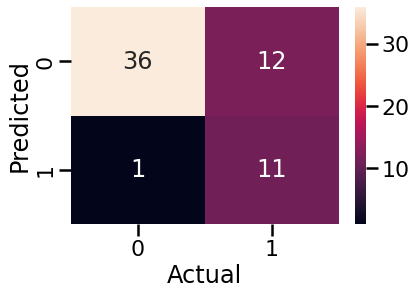

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pipe.fit(X_train, y_train)

y_pred1 = lr_clf_pipe.predict(X_test)
evaluate_model(y_test, y_pred1)

### Support Vector Classifier
A support vector classifier (SVC) is a supervised machine learning model that uses classification algorithms for two-group classification problems. 

In [52]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made. 

Accuracy Score:  0.6166666666666667
Precision Score:  0.5
Recall Score:  0.08695652173913043
Confusion Matrix:  [[35  2]
 [21  2]]


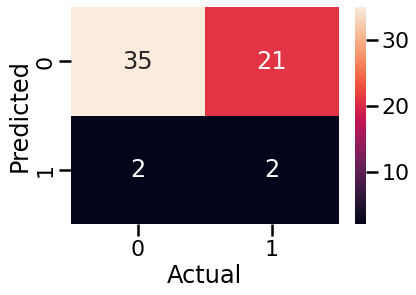

In [54]:
svc = SVC(C = 100, gamma=0.0001)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
evaluate_model(y_test, y_pred2)

### Decision Tree Classifier and RandomizedSearchCV
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

**RandomizedSearchCV** implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs =20, clf = DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    
    print("Training Score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Score: {:.3f}".format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy','gini'],
                     'splitter':['random','best'],
                     'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
                     'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                     'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                     'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                     'max_leaf_nodes':[10,15,20,25,30,45,50,None],
                     'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                     'max_depth':[None, 2, 4, 6, 8],
                     'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training Score: 0.853
Test Score: 0.817


DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=0.95,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=6, random_state=2)

Accuracy Score:  0.8166666666666667
Precision Score:  0.875
Recall Score:  0.6086956521739131
Confusion Matrix:  [[35  2]
 [ 9 14]]


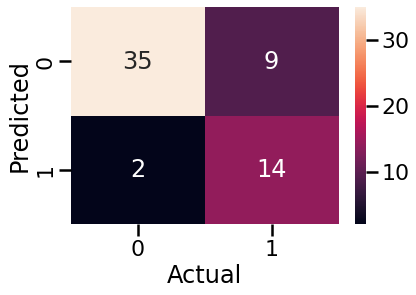

In [59]:
ds_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=0.95,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=6, random_state=2)

ds_clf.fit(X_train, y_train)
pred4 = ds_clf.predict(X_test)
evaluate_model(y_test, pred4)

### Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [60]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params = {'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
                     'min_impurity_decrease':[0.0, 0.001, 0.05, 0.10, 0.15, 0.2],
                     'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40],
                     'max_depth':[None, 2, 4, 6, 8, 10, 20],
                           }, clf = RandomForestClassifier(random_state=2))

Training Score: 0.853
Test Score: 0.833


RandomForestClassifier(max_features=0.55, min_samples_leaf=2, random_state=2)

Accuracy Score:  0.8333333333333334
Precision Score:  0.8823529411764706
Recall Score:  0.6521739130434783
Confusion Matrix:  [[35  2]
 [ 8 15]]


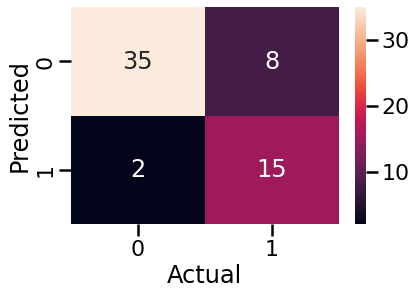

In [61]:
rf_clf = RandomForestClassifier(max_features=0.55, min_samples_leaf=2, random_state=2)
rf_clf.fit(X_train, y_train)
pred5 = rf_clf.predict(X_test)
evaluate_model(y_test, pred5)

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [70]:
from xgboost import XGBClassifier

In [79]:
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 500,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]

xgb1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.64690
[1]	validation_0-logloss:0.60789
[2]	validation_0-logloss:0.57185
[3]	validation_0-logloss:0.54400
[4]	validation_0-logloss:0.52026
[5]	validation_0-logloss:0.50044
[6]	validation_0-logloss:0.48670
[7]	validation_0-logloss:0.46671
[8]	validation_0-logloss:0.45347
[9]	validation_0-logloss:0.44399
[10]	validation_0-logloss:0.43695
[11]	validation_0-logloss:0.42949
[12]	validation_0-logloss:0.42443
[13]	validation_0-logloss:0.41816
[14]	validation_0-logloss:0.41175
[15]	validation_0-logloss:0.40732
[16]	validation_0-logloss:0.40487
[17]	validation_0-logloss:0.40202
[18]	validation_0-logloss:0.39875
[19]	validation_0-logloss:0.39830
[20]	validation_0-logloss:0.39800
[21]	validation_0-logloss:0.39569
[22]	validation_0-logloss:0.39455
[23]	validation_0-logloss:0.39473
[24]	validation_0-logloss:0.39311
[25]	validation_0-logloss:0.39218
[26]	validation_0-logloss:0.39112
[27]	validation_0-logloss:0.38783
[28]	validation_0-logloss:0.38768
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy Score:  0.8166666666666667
Precision Score:  0.875
Recall Score:  0.6086956521739131
Confusion Matrix:  [[35  2]
 [ 9 14]]


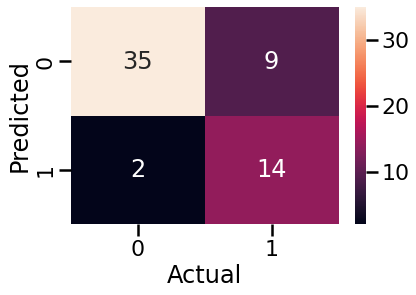

In [80]:
pred6 = xgb1.predict(X_test)
evaluate_model(y_test, pred6)

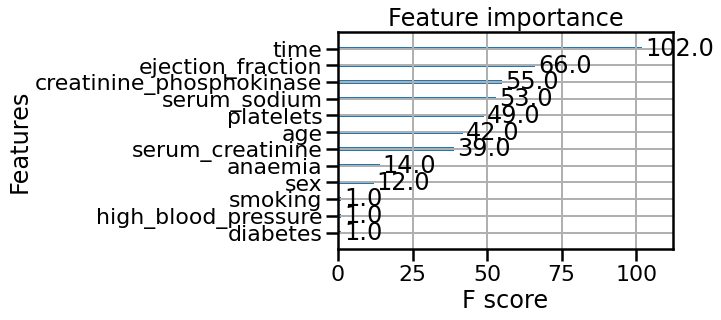

<Figure size 432x288 with 0 Axes>

In [81]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()
plt.savefig('xgb1.png')

### Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

Accuracy Score:  0.8333333333333334
Precision Score:  0.9333333333333333
Recall Score:  0.6086956521739131
Confusion Matrix:  [[36  1]
 [ 9 14]]


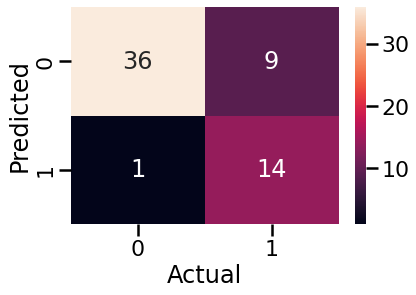

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, max_depth=1, random_state=0)
gbdt.fit(X_train, y_train)

pred_gbdt = gbdt.predict(X_test)
evaluate_model(y_test, pred_gbdt)

### Final Selection
After evaluating different classification algorithms we can see that the **GradientBoostingClassifier** had the best accuracy therefore we will use this algorithm as our final model.

In [83]:
import joblib
joblib.dump(gbdt, 'heart_predictor_model.pkl')
model = joblib.load('heart_predictor_model.pkl')
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [89]:
predictions = model.predict(X_test)
df_pred = pd.DataFrame(predictions)
df_pred.head()

,0
0,0
1,0
2,1
3,0
4,0
